<IPython.core.display.Javascript object>


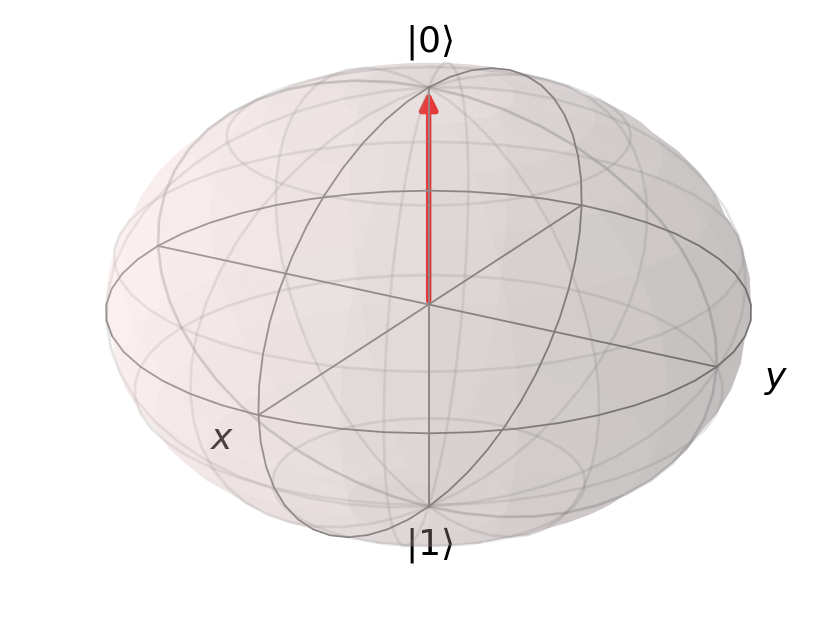

In [3]:
%matplotlib notebook
import numpy as np
import qutip as q
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from mpl_toolkits.mplot3d import Axes3D

up = q.basis(2,0)
sx = q.sigmax()
sy = q.sigmay()
sz = q.sigmaz()
bz = 0.
by = 0.
bx = 20.
w = np.pi/20
H = w * (sx * bx + sy * by + sz * bz)

fig = plt.figure()
ax = Axes3D(fig)
sphere = q.Bloch(axes=ax)
sphere.size = [7, 7]
sphere.add_states(up)

def state(t):
    states = [q.Qobj.expm(-(0+1j)*H*t)*up]
    return states


def ini():
    sphere.vector_color=("r")
    return ax

t = np.linspace(0, 1, 50)

def animate(i):
    sphere.clear()
    states = state(i)
    sphere.add_states(states)
    sphere.make_sphere()
    return ax

ani = ani.FuncAnimation(fig, animate, frames=t, init_func=ini, repeat=False)

plt.show() 

In [ ]:
%matplotlib notebook
from qutip import *
from scipy import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from mpl_toolkits.mplot3d import Axes3D


def qubit_integrate(w, theta, gamma1, gamma2, psi0, tlist):
    # operators and the hamiltonian
    sx = sigmax(); sy = sigmay(); sz = sigmaz(); sm = sigmam()
    H = w * (cos(theta) * sz + sin(theta) * sx)
    # collapse operators
    c_op_list = []
    n_th = 0.5 # temperature
    rate = gamma1 * (n_th + 1)
    if rate > 0.0: c_op_list.append(sqrt(rate) * sm)
    rate = gamma1 * n_th
    if rate > 0.0: c_op_list.append(sqrt(rate) * sm.dag())
    rate = gamma2
    if rate > 0.0: c_op_list.append(sqrt(rate) * sz)


    # evolve and calculate expectation values
    output = mesolve(H, psi0, tlist, c_op_list, [sx, sy, sz])  
    return output.expect[0], output.expect[1], output.expect[2]
    
## calculate the dynamics
w     = 5.0 * 2 * pi   # qubit angular frequency
theta = 0.2 * pi       # qubit angle from sigma_z axis (toward sigma_x axis)
gamma1 = 0.5      # qubit relaxation rate
gamma2 = 0.2      # qubit dephasing rate

# initial state
a = 1.0
psi0 = (a* basis(2,0) + (1-a)*basis(2,1))/(sqrt(a**2 + (1-a)**2))
tlist = linspace(0, 1, 250)
#expectation values for ploting
sx, sy, sz = qubit_integrate(w, theta, gamma1, gamma2, psi0, tlist)

fig = plt.figure()
ax = Axes3D(fig, azim=-40, elev=30)

b = Bloch(axes=ax)
b.vector_color = ['r']
b.view = [-40, 30]
b.add_states(basis(2, 0))

def animate(i):
    b.clear()
    b.add_vectors([np.sin(theta),0,np.cos(theta)])
    #b.add_points([sx[:i+1],sy[:i+1],sz[:i+1]])
    b.make_sphere()
    return ax

def ini():
    b.vector_color=("r")
    return ax


animlist = np.arange(0, len(sx))
ani = ani.FuncAnimation(fig, animate, np.arange(len(sx)), init_func=ini, blit=True, repeat=False)

plt.show() 

In [ ]:
%matplotlib notebook
from pylab import *
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

fig = figure()
ax = Axes3D(fig,azim=-40,elev=30)
sphere = Bloch(axes=ax)

def animate(i):
    sphere.clear()
    sphere.add_vectors([np.sin(theta),0,np.cos(theta)])
    sphere.add_points([sx[:i+1],sy[:i+1],sz[:i+1]])
    sphere.make_sphere()
    return ax

def init():
    sphere.vector_color = ['r']
    return ax

ani = animation.FuncAnimation(fig, animate, np.arange(len(sx)),
                            init_func=init, blit=True, repeat=False)
#ani.save('bloch_sphere.mp4', fps=20, clear_temp=True)